In [140]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
pd.set_option('display.max_rows', None)

In [142]:
app=pd.read_csv('application_data.csv')
prev=pd.read_csv('previous_application.csv')


In [143]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
nrows=app.shape[0]
ncols=app.shape[1]

In [145]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [146]:
object_columns = app.select_dtypes(include=['object']).columns
print(object_columns)   #these are columns of object/string type 

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


In [147]:
app[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']].head()
#These are the columns of string type, most of them are categorical.

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [148]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Cleaning

In [149]:
# Null value analysis

In [150]:
app.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [151]:
(app.isna().sum() / nrows).sort_values(ascending=False).head(70)

COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
COMMONAREA_MEDI                 0.698723
NONLIVINGAPARTMENTS_MEDI        0.694330
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_AVG            0.683550
LIVINGAPARTMENTS_MEDI           0.683550
LIVINGAPARTMENTS_MODE           0.683550
FLOORSMIN_MODE                  0.678486
FLOORSMIN_AVG                   0.678486
FLOORSMIN_MEDI                  0.678486
YEARS_BUILD_AVG                 0.664978
YEARS_BUILD_MODE                0.664978
YEARS_BUILD_MEDI                0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MEDI                   0.593767
LANDAREA_AVG                    0.593767
LANDAREA_MODE                   0.593767
BASEMENTAREA_MODE               0.585160
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_MO

In [152]:
plt.figure(figsize=(240,20))
#sns.heatmap(app.isna())   #This heatmap is used to visualize the proportion of null values in the entire dataset and 
#it also helps to visually see the amount/percentage of null values in various columns

<Figure size 24000x2000 with 0 Axes>

<Figure size 24000x2000 with 0 Axes>

<Axes: xlabel='COMMONAREA_AVG', ylabel='Count'>

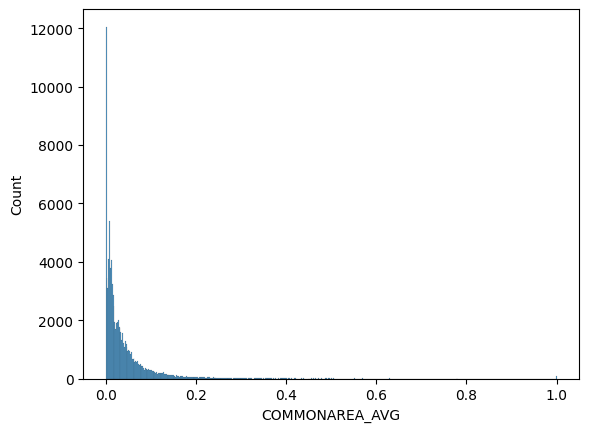

In [153]:
sns.histplot(app['COMMONAREA_AVG'])

(0.0, 0.2)

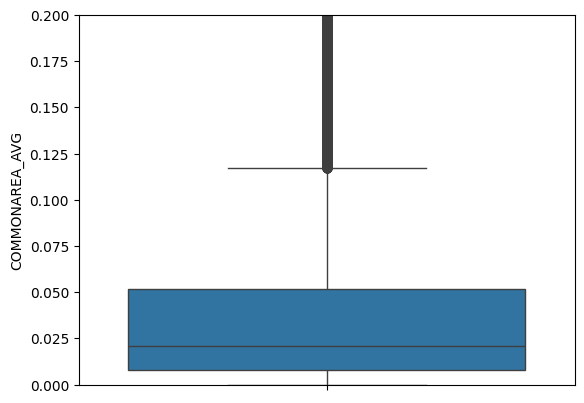

In [154]:
sns.boxplot(app['COMMONAREA_AVG'])
plt.ylim([0,0.2])

In [155]:
np.median(app['COMMONAREA_AVG'].dropna())

np.float64(0.0211)

In [156]:
np.mean(app['COMMONAREA_AVG'].dropna())

np.float64(0.044620715411350736)

In [157]:
prc=app['TARGET'].value_counts().reset_index()
prc['perc']=(prc['count']/app.shape[0])*100
prc
#This shows it is an imbalanced dataset as rows with target=1 are around 91.93% of all the rows in the dataset.

,TARGET,count,perc
0,0,282686,91.927118
1,1,24825,8.072882


<Axes: xlabel='TARGET', ylabel='count'>

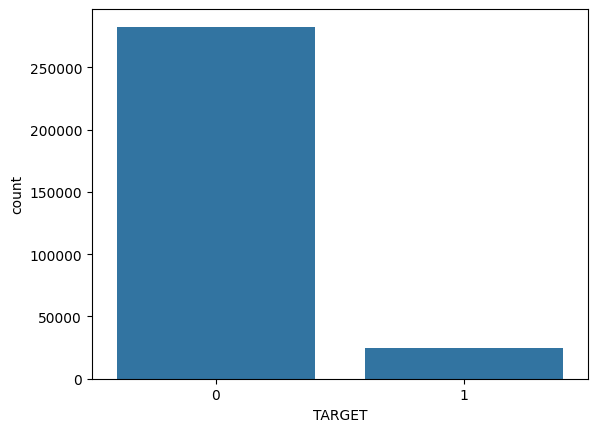

In [158]:
sns.countplot(data=app,x='TARGET')

(0.0, 0.5)

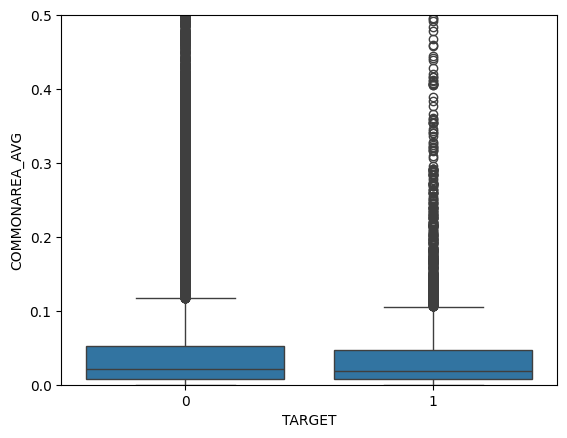

In [159]:
sns.boxplot(data=app,y=app['COMMONAREA_AVG'].dropna(),x='TARGET')
plt.ylim([0,0.5])

The above boxplot shows that for the target variable, the values of 'COMMONAREA_AVG' give the nearly same output(of 0 and 1). So this column will not help a lot in differentiating between a 0 target value and a 1 target value. Hence we drop this column. Same is the case with 'COMMONAREA_MODE' and 'COMMONAREA_MEDI' column

(0.0, 0.5)

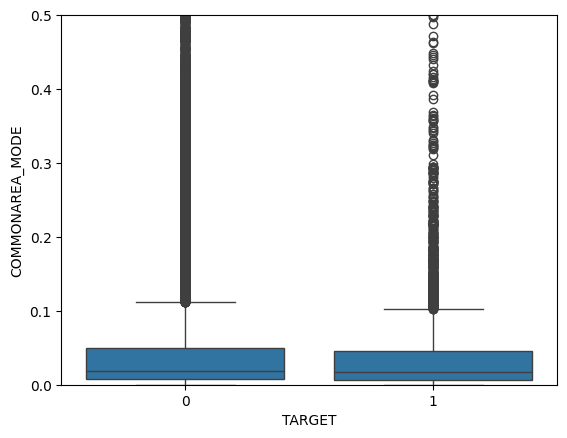

In [160]:
sns.boxplot(data=app,y=app['COMMONAREA_MODE'].dropna(),x='TARGET')
plt.ylim([0,0.5])

(0.0, 0.5)

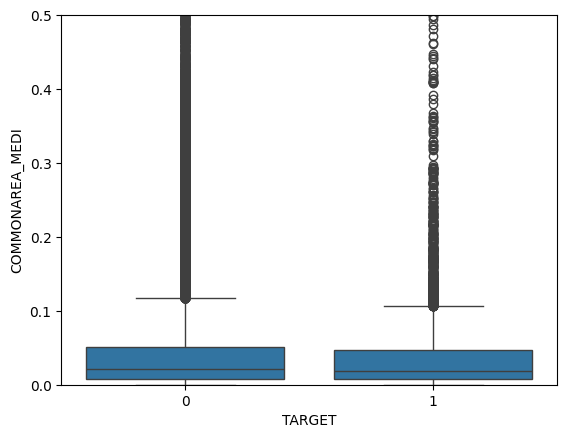

In [161]:
sns.boxplot(data=app,y=app['COMMONAREA_MEDI'].dropna(),x='TARGET')
plt.ylim([0,0.5])

(0.0, 0.01)

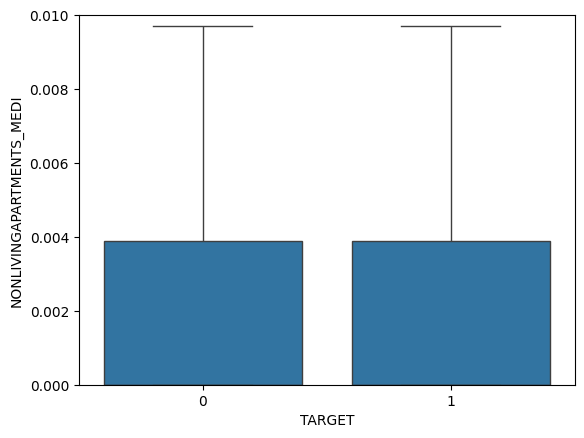

In [162]:
sns.boxplot(data=app,y=app['NONLIVINGAPARTMENTS_MEDI'].dropna(),x='TARGET')
plt.ylim([0,0.01])

<Axes: xlabel='TARGET', ylabel='FONDKAPREMONT_MODE'>

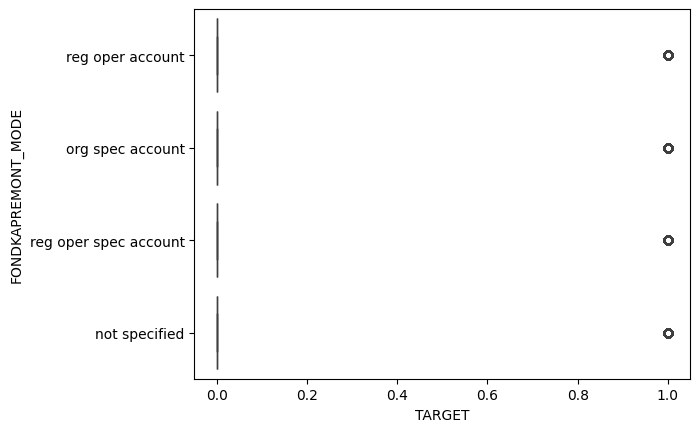

In [163]:
sns.boxplot(data=app,y=app['FONDKAPREMONT_MODE'].dropna(),x='TARGET')
#check

In [164]:
app['FONDKAPREMONT_MODE'].unique()

array(['reg oper account', nan, 'org spec account',
       'reg oper spec account', 'not specified'], dtype=object)

In [165]:
app['FONDKAPREMONT_MODE'].dropna().head()

0     reg oper account
1     reg oper account
12    reg oper account
13    reg oper account
14    reg oper account
Name: FONDKAPREMONT_MODE, dtype: object

<Axes: xlabel='TARGET', ylabel='FONDKAPREMONT_MODE'>

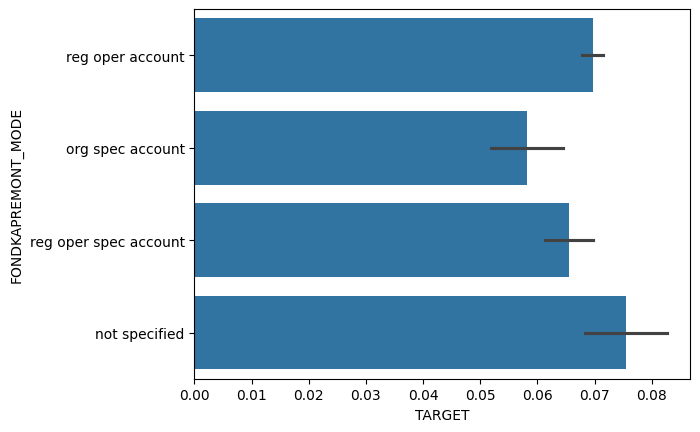

In [166]:
sns.barplot(data=app,y=app['FONDKAPREMONT_MODE'].dropna(),x='TARGET')


(0.0, 0.3)

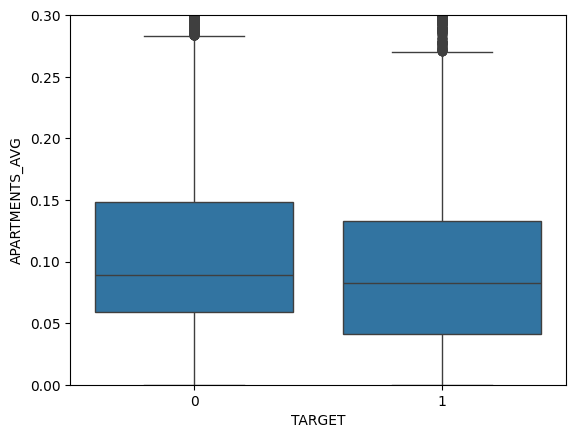

In [167]:
sns.boxplot(data=app,y=app['APARTMENTS_AVG'].dropna(),x='TARGET')
plt.ylim([0,.3])

(0.0, 23.0)

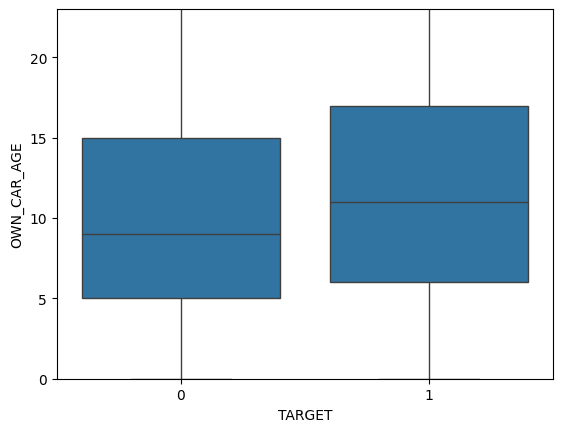

In [168]:
sns.boxplot(data=app,y=app['OWN_CAR_AGE'].dropna(),x='TARGET')
plt.ylim([0,23])

(0.0, 0.3)

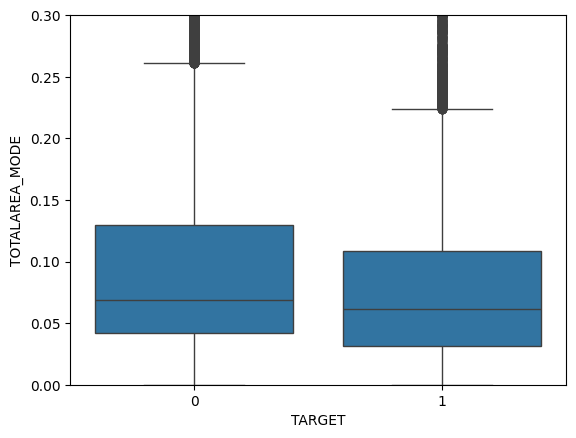

In [169]:
sns.boxplot(data=app,y=app['TOTALAREA_MODE'].dropna(),x='TARGET')
plt.ylim([0,0.3])
# plt.xlim([0,.2])


The above boxplots show that for the continuous variables in the app dataset most of the values which talk about mean,median, mode statistics 
eventually lead to very similiar target values of 0 and 1 so dropping these values will not hugely affect our target values.

In [170]:
obj_cols_app=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
#These are categorical columns

In [171]:
null_df=(app.drop(obj_cols_app,axis=1).isna().sum() / nrows).sort_values(ascending=False).reset_index()
object_columns = app.select_dtypes(include=['object']).columns
# null_df[null_df['index'] not in object_columns]
# null_df[null_df['index'] not in obj_cols_app]
null_df

,index,0
0,COMMONAREA_AVG,0.698723
1,COMMONAREA_MODE,0.698723
2,COMMONAREA_MEDI,0.698723
3,NONLIVINGAPARTMENTS_MODE,0.694330
4,NONLIVINGAPARTMENTS_AVG,0.694330
5,NONLIVINGAPARTMENTS_MEDI,0.694330
6,LIVINGAPARTMENTS_AVG,0.683550
7,LIVINGAPARTMENTS_MODE,0.683550
8,LIVINGAPARTMENTS_MEDI,0.683550
9,FLOORSMIN_AVG,0.678486


In [172]:
null_df_drop=null_df[null_df[0]>.47]
null_df_drop

,index,0
0,COMMONAREA_AVG,0.698723
1,COMMONAREA_MODE,0.698723
2,COMMONAREA_MEDI,0.698723
3,NONLIVINGAPARTMENTS_MODE,0.694330
4,NONLIVINGAPARTMENTS_AVG,0.694330
5,NONLIVINGAPARTMENTS_MEDI,0.694330
6,LIVINGAPARTMENTS_AVG,0.683550
7,LIVINGAPARTMENTS_MODE,0.683550
8,LIVINGAPARTMENTS_MEDI,0.683550
9,FLOORSMIN_AVG,0.678486


In [173]:
lst=list(null_df_drop['index'])
lst

['COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'COMMONAREA_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'BASEMENTAREA_AVG',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'APARTMENTS_MODE',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'ENTRANCES_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'TOTALAREA_MODE']

In [ ]:
# app.drop(lst,axis=1)

In [ ]:
# null_df_drop['index']

In [ ]:
app#.drop()

In [ ]:
# COMMONAREA_AVG                  0.698723
# COMMONAREA_MODE                 0.698723
# COMMONAREA_MEDI                 0.698723
# NONLIVINGAPARTMENTS_MEDI        0.694330
# NONLIVINGAPARTMENTS_MODE        0.694330
# NONLIVINGAPARTMENTS_AVG         0.694330
# FONDKAPREMONT_MODE              0.683862
# LIVINGAPARTMENTS_AVG            0.683550
# LIVINGAPARTMENTS_MEDI           0.683550
# LIVINGAPARTMENTS_MODE           0.683550
# FLOORSMIN_MODE                  0.678486
# FLOORSMIN_AVG                   0.678486
# FLOORSMIN_MEDI                  0.678486
# YEARS_BUILD_AVG                 0.664978
# YEARS_BUILD_MODE                0.664978
# YEARS_BUILD_MEDI                0.664978
# OWN_CAR_AGE                     0.659908
# LANDAREA_MEDI                   0.593767
# LANDAREA_AVG                    0.593767
# LANDAREA_MODE                   0.593767
# BASEMENTAREA_MODE               0.585160
# BASEMENTAREA_MEDI               0.585160
# BASEMENTAREA_AVG                0.585160
# EXT_SOURCE_1                    0.563811
# NONLIVINGAREA_MODE              0.551792
# NONLIVINGAREA_AVG               0.551792
# NONLIVINGAREA_MEDI              0.551792
# ELEVATORS_AVG                   0.532960
# ELEVATORS_MEDI                  0.532960
# ELEVATORS_MODE                  0.532960
# WALLSMATERIAL_MODE              0.508408
# APARTMENTS_AVG                  0.507497
# APARTMENTS_MEDI                 0.507497
# APARTMENTS_MODE                 0.507497
# ENTRANCES_MODE                  0.503488
# ENTRANCES_MEDI                  0.503488
# ENTRANCES_AVG                   0.503488
# LIVINGAREA_AVG                  0.501933
# LIVINGAREA_MEDI                 0.501933
# LIVINGAREA_MODE                 0.501933
# HOUSETYPE_MODE                  0.501761
# FLOORSMAX_MODE                  0.497608
# FLOORSMAX_AVG                   0.497608
# FLOORSMAX_MEDI                  0.497608
# YEARS_BEGINEXPLUATATION_MODE    0.487810
# YEARS_BEGINEXPLUATATION_MEDI    0.487810
# YEARS_BEGINEXPLUATATION_AVG     0.487810
# TOTALAREA_MODE                  0.482685
# EMERGENCYSTATE_MODE             0.473983
# OCCUPATION_TYPE COMMONAREA_AVG                  0.698723
# COMMONAREA_MODE                 0.698723
# COMMONAREA_MEDI                 0.698723
# NONLIVINGAPARTMENTS_MEDI        0.694330
# NONLIVINGAPARTMENTS_MODE        0.694330
# NONLIVINGAPARTMENTS_AVG         0.694330
# FONDKAPREMONT_MODE              0.683862
# LIVINGAPARTMENTS_AVG            0.683550
# LIVINGAPARTMENTS_MEDI           0.683550
# LIVINGAPARTMENTS_MODE           0.683550
# FLOORSMIN_MODE                  0.678486
# FLOORSMIN_AVG                   0.678486
# FLOORSMIN_MEDI                  0.678486
# YEARS_BUILD_AVG                 0.664978
# YEARS_BUILD_MODE                0.664978
# YEARS_BUILD_MEDI                0.664978
# OWN_CAR_AGE                     0.659908
# LANDAREA_MEDI                   0.593767
# LANDAREA_AVG                    0.593767
# LANDAREA_MODE                   0.593767
# BASEMENTAREA_MODE               0.585160
# BASEMENTAREA_MEDI               0.585160
# BASEMENTAREA_AVG                0.585160
# EXT_SOURCE_1                    0.563811
# NONLIVINGAREA_MODE              0.551792
# NONLIVINGAREA_AVG               0.551792
# NONLIVINGAREA_MEDI              0.551792
# ELEVATORS_AVG                   0.532960
# ELEVATORS_MEDI                  0.532960
# ELEVATORS_MODE                  0.532960
# WALLSMATERIAL_MODE              0.508408
# APARTMENTS_AVG                  0.507497
# APARTMENTS_MEDI                 0.507497
# APARTMENTS_MODE                 0.507497
# ENTRANCES_MODE                  0.503488
# ENTRANCES_MEDI                  0.503488
# ENTRANCES_AVG                   0.503488
# LIVINGAREA_AVG                  0.501933
# LIVINGAREA_MEDI                 0.501933
# LIVINGAREA_MODE                 0.501933
# HOUSETYPE_MODE                  0.501761
# FLOORSMAX_MODE                  0.497608
# FLOORSMAX_AVG                   0.497608
# FLOORSMAX_MEDI                  0.497608
# YEARS_BEGINEXPLUATATION_MODE    0.487810
# YEARS_BEGINEXPLUATATION_MEDI    0.487810
# YEARS_BEGINEXPLUATATION_AVG     0.487810
# TOTALAREA_MODE                  0.482685
# EMERGENCYSTATE_MODE             0.473983
# OCCUPATION_TYPE 

In [106]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [108]:
prev.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [117]:
prev.shape[0]

1670214

In [118]:
(prev.isna().sum() / prev.shape[0]).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       9.964370e-01
RATE_INTEREST_PRIMARY          9.964370e-01
AMT_DOWN_PAYMENT               5.363648e-01
RATE_DOWN_PAYMENT              5.363648e-01
NAME_TYPE_SUITE                4.911975e-01
DAYS_TERMINATION               4.029813e-01
DAYS_FIRST_DRAWING             4.029813e-01
DAYS_FIRST_DUE                 4.029813e-01
DAYS_LAST_DUE_1ST_VERSION      4.029813e-01
DAYS_LAST_DUE                  4.029813e-01
NFLAG_INSURED_ON_APPROVAL      4.029813e-01
AMT_GOODS_PRICE                2.308177e-01
AMT_ANNUITY                    2.228667e-01
CNT_PAYMENT                    2.228637e-01
PRODUCT_COMBINATION            2.071591e-04
AMT_CREDIT                     5.987257e-07
SK_ID_PREV                     0.000000e+00
AMT_APPLICATION                0.000000e+00
NAME_CONTRACT_TYPE             0.000000e+00
SK_ID_CURR                     0.000000e+00
WEEKDAY_APPR_PROCESS_START     0.000000e+00
CODE_REJECT_REASON             0.000000e+00
NAME_PAYMENT_TYPE              0

<Axes: >

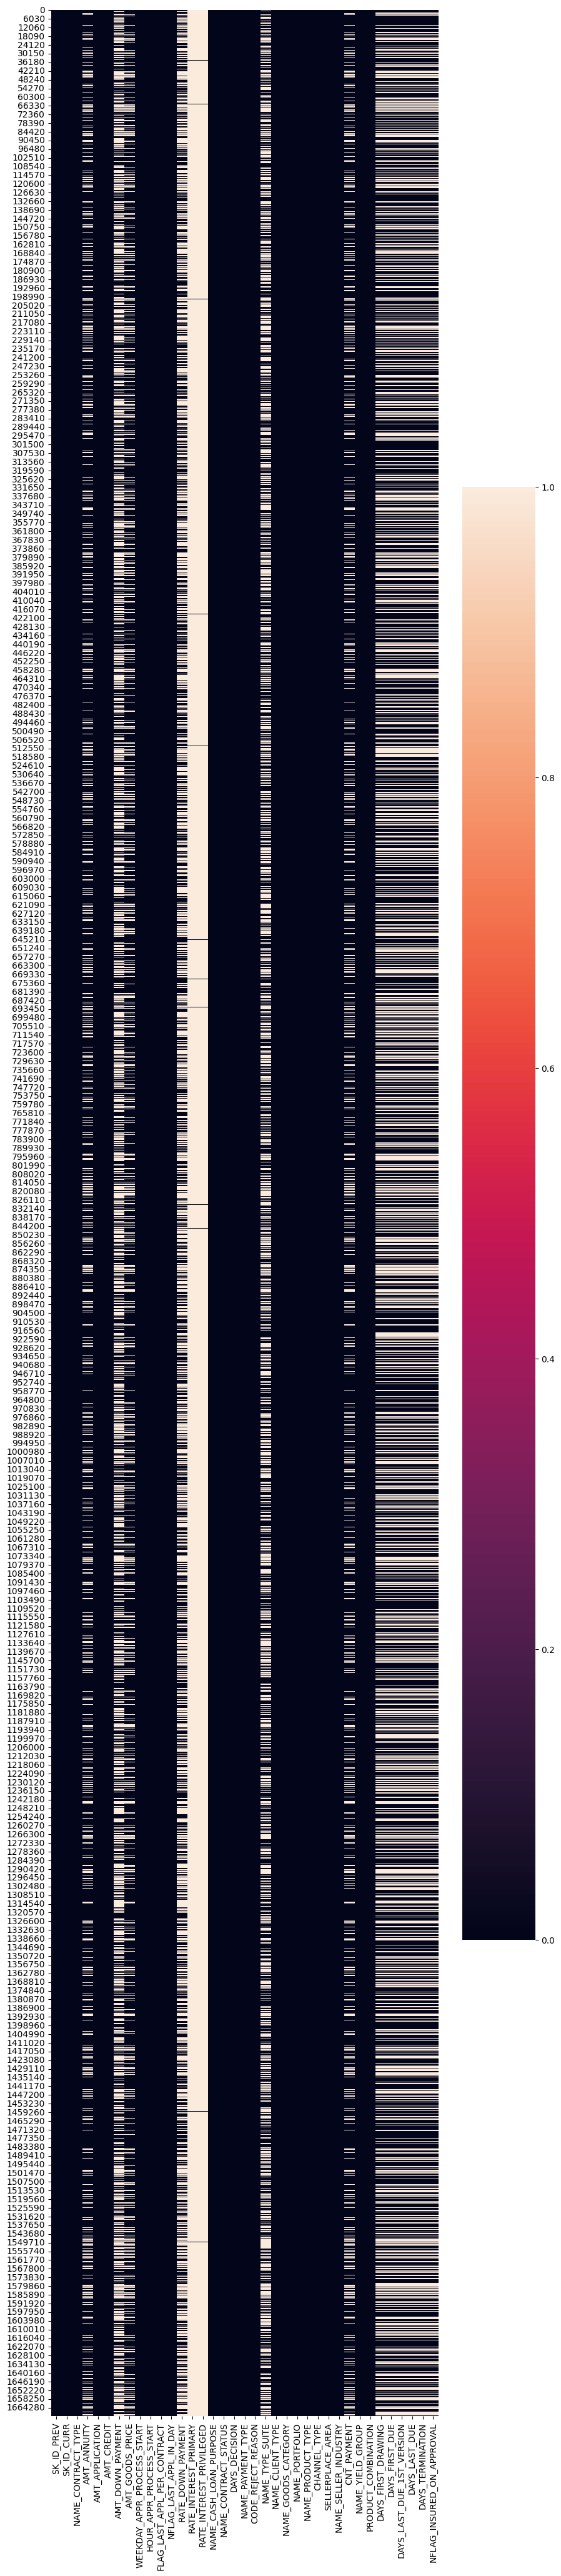

In [121]:
plt.figure(figsize=(10,50))
sns.heatmap(prev.isna())